# Yumurta Satışlarının Analizi

Bu dosyada 6lı ve 10lu yumurta satışlarının analizini gerçekleştireceğiz.

Veri kümesini okuyarak başlayalım.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df= pd.read_csv('.....')
df.columns = ['Tarih', 'Magaza', 'UrunNo', 'Tur', 'Tutar']
df.head()

,Tarih,Magaza,UrunNo,Tur,Tutar
0,05.05.2015,4561,20000021,6.0,3.1
1,29.03.2015,1992,20000301,10.0,26.1
2,12.05.2015,2126,20000290,6.0,59.8
3,03.04.2015,4193,20000080,10.0,35.5
4,13.02.2015,1095,20000020,6.0,4.8


Ürün türleri ondalıklı olarak verilmiş. Bunları tamsayıya çevirelim.

In [2]:
df['Tur'] = df['Tur'].astype(int)

In [3]:
df.head()

,Tarih,Magaza,UrunNo,Tur,Tutar
0,05.05.2015,4561,20000021,6,3.1
1,29.03.2015,1992,20000301,10,26.1
2,12.05.2015,2126,20000290,6,59.8
3,03.04.2015,4193,20000080,10,35.5
4,13.02.2015,1095,20000020,6,4.8


Veride gün ve mağaza bazında 6lı ve 10lu yumurtaların ürün başına satış miktarları var. Sadece 6lı ürünleri içeren bir veri çerçevesi oluşturalım.

In [4]:
df_6 = df[df['Tur'] == 6]

In [5]:
df_6.head()

,Tarih,Magaza,UrunNo,Tur,Tutar
0,05.05.2015,4561,20000021,6,3.1
2,12.05.2015,2126,20000290,6,59.8
4,13.02.2015,1095,20000020,6,4.8
9,26.09.2015,4327,20000021,6,32.5
12,06.11.2015,285,20001932,6,15.7


Tarih, ürün ve mağaza bazında en çok satan ürünleri bulalım.

In [6]:
df_6.sort_values(by = ['Tutar'], ascending = False).head(10)

,Tarih,Magaza,UrunNo,Tur,Tutar
398539,01.10.2015,279,20000021,6,542.2
73600,12.12.2015,480,20000021,6,444.0
382705,04.01.2015,1096,20000020,6,426.1
445619,24.10.2015,279,20000021,6,396.4
107927,27.09.2015,1096,20000021,6,394.5
398366,03.01.2015,1096,20000020,6,393.7
279825,10.04.2015,3413,20000020,6,393.2
76942,21.02.2015,1096,20000020,6,374.1
346259,18.10.2015,1096,20000021,6,373.4
331672,31.01.2015,279,20000020,6,366.6


Ürün numarası ve mağazalarla ilgilenmeden gün bazında 6lı yumurta satışlarını toplayalım.

In [7]:
df_6 = df_6.groupby(by=['....']).agg({...................}).reset_index()
print(df_6)

          Tarih    Tutar
0    01.01.2015  26154.9
1    01.02.2015  24726.9
2    01.03.2015  26399.4
3    01.04.2015  25856.4
4    01.05.2015  27269.6
..          ...      ...
360  31.05.2015  19880.3
361  31.07.2015  26390.5
362  31.08.2015  33511.8
363  31.10.2015  32907.7
364  31.12.2015  34291.0

[365 rows x 2 columns]


# Index

Pandas indexleri veri çerçevelerinin en önemli temel taşlarından biridir. Veri çerçevelerindeki işlemler index üzerinden daha kolay bir şekilde yürütülebilir. Bu örnekte index olarak tarih değerlerini kullanacağız. Tarih kolonunu tarih veri tipine çeirerek index değerine atayacağız.


In [8]:
df_6.index = pd.to_datetime(df_6['Tarih'])
df_6.tail()

,Tarih,Tutar
Tarih,,
2015-05-31,31.05.2015,19880.3
2015-07-31,31.07.2015,26390.5
2015-08-31,31.08.2015,33511.8
2015-10-31,31.10.2015,32907.7
2015-12-31,31.12.2015,34291.0


Tarih kolonunu silelim.

In [9]:
df_6.drop('Tarih', axis = 1, inplace = True)
df_6.head()

,Tutar
Tarih,
2015-01-01,26154.9
2015-01-02,24726.9
2015-01-03,26399.4
2015-01-04,25856.4
2015-01-05,27269.6


Tarihe göre sıralayalım.

In [10]:
df_6 = df_6.sort_index()
print(df_6.head())
print(df_6.tail())

              Tutar
Tarih              
2015-01-01  26154.9
2015-01-02  24726.9
2015-01-03  26399.4
2015-01-04  25856.4
2015-01-05  27269.6
              Tutar
Tarih              
2015-12-27  33019.0
2015-12-28  26494.9
2015-12-29  22616.4
2015-12-30  36155.7
2015-12-31  34291.0


Şimdi satışın yıllık grafiğini çizelim

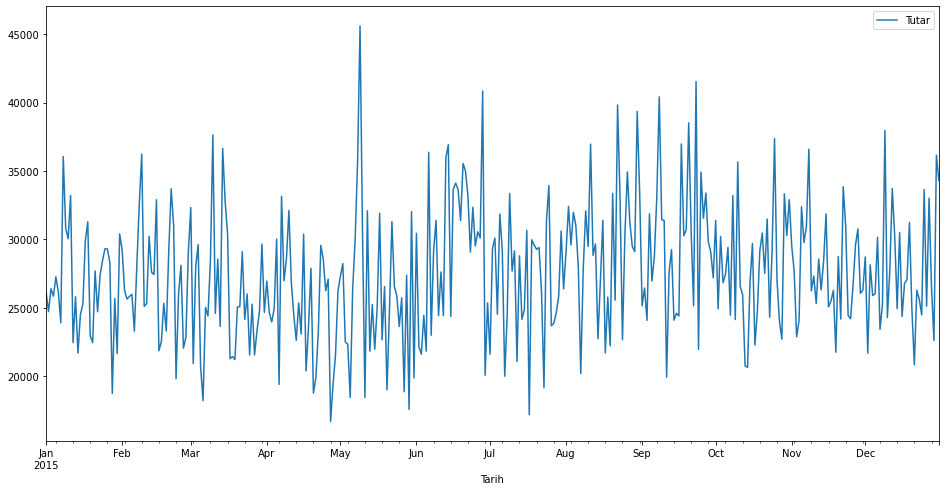

In [11]:
df_6.plot(figsize = (16,8))
plt.show()

Şimdi yumurta satışlarını yumurtanın paket büyüklüğüne göre günlük olarak derleyen bir fonksiyon oluşturalım. Fonksiyon bir veri çerçevesi ve yumurta paket büyüklüğünü alacak. Fonksiyona verinin ham halini sağlayacağız.

In [12]:
df.head()

,Tarih,Magaza,UrunNo,Tur,Tutar
0,05.05.2015,4561,20000021,6,3.1
1,29.03.2015,1992,20000301,10,26.1
2,12.05.2015,2126,20000290,6,59.8
3,03.04.2015,4193,20000080,10,35.5
4,13.02.2015,1095,20000020,6,4.8


In [13]:
def yumurta_gunluk(df, paket = 6):
    df_gunluk = df[df['Tur'] == paket]
    df_gunluk = df_gunluk.groupby('Tarih').agg({'Tutar':'sum'}).reset_index()
    df_gunluk.index = pd.to_datetime(df_gunluk['Tarih'])
    df_gunluk.drop('Tarih', axis = 1, inplace = True)
    #df_gunluk = df_gunluk.groupby(level = 0).agg({'Tutar': 'sum'})
    df_gunluk = df_gunluk.sort_index()
    df_gunluk.columns = ['Tutar_' + str(paket)]
    return df_gunluk


In [14]:
df_6_gunluk = yumurta_gunluk(df, 6)
df_10_gunluk = yumurta_gunluk(df, 10)

In [15]:
print(df_6_gunluk.head())
print(df_6_gunluk.tail())
print(df_10_gunluk.head())
print(df_10_gunluk.tail())

            Tutar_6
Tarih              
2015-01-01  26154.9
2015-01-02  24726.9
2015-01-03  26399.4
2015-01-04  25856.4
2015-01-05  27269.6
            Tutar_6
Tarih              
2015-12-27  33019.0
2015-12-28  26494.9
2015-12-29  22616.4
2015-12-30  36155.7
2015-12-31  34291.0
            Tutar_10
Tarih               
2015-01-01   47842.4
2015-01-02   46819.0
2015-01-03   69630.5
2015-01-04   48920.1
2015-01-05   51305.2
            Tutar_10
Tarih               
2015-12-27   68293.0
2015-12-28   62676.3
2015-12-29   65992.9
2015-12-30   91600.8
2015-12-31   74096.0


Şimdi bu iki veri çerçevesini birleştirerek üçüncü bir veri çerçevesi oluşturalım.

In [16]:
df_yumurta = pd.concat((df_6_gunluk, df_10_gunluk), axis=1)
print(df_yumurta.head())
print(df_yumurta.tail())

            Tutar_6  Tutar_10
Tarih                        
2015-01-01  26154.9   47842.4
2015-01-02  24726.9   46819.0
2015-01-03  26399.4   69630.5
2015-01-04  25856.4   48920.1
2015-01-05  27269.6   51305.2
            Tutar_6  Tutar_10
Tarih                        
2015-12-27  33019.0   68293.0
2015-12-28  26494.9   62676.3
2015-12-29  22616.4   65992.9
2015-12-30  36155.7   91600.8
2015-12-31  34291.0   74096.0


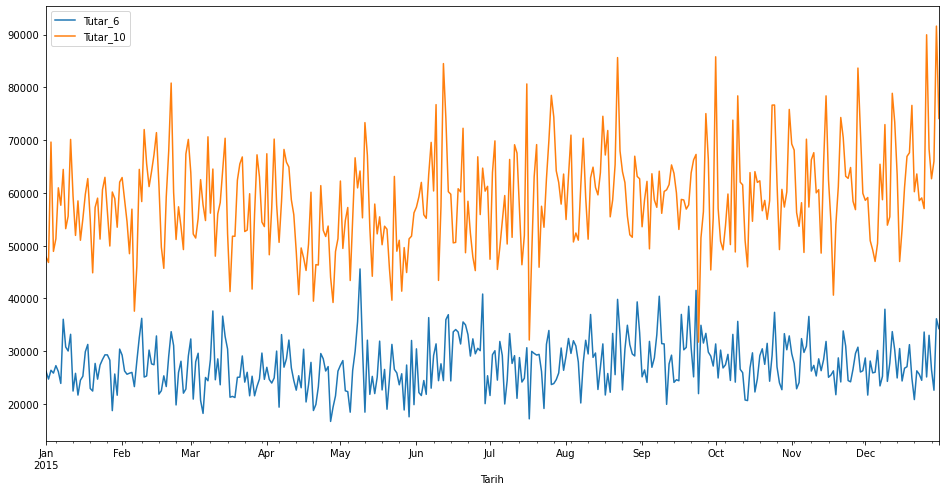

In [17]:
df_yumurta.plot(figsize = (16,8))
plt.show()

İndexin zaman olması, aylık ya da haftalık olarak verileri toplulaştırmamıza imkan tanır.

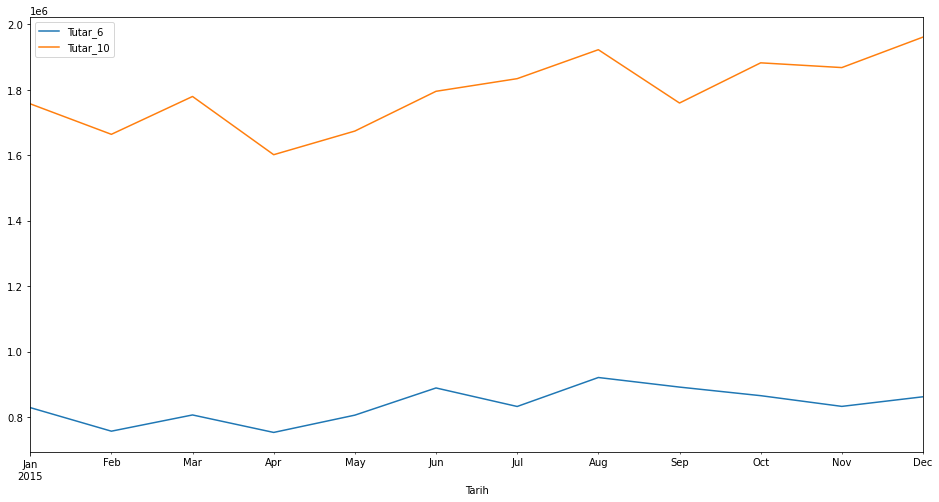

In [18]:
df_monthly = df_yumurta.resample(......).sum()
df_monthly.plot(figsize=(16,8))
plt.show()

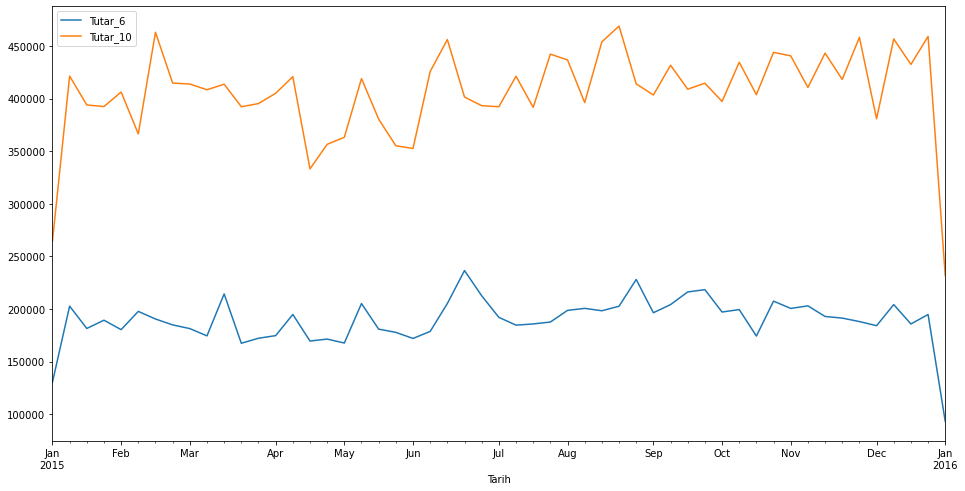

In [19]:
df_weekly = df_yumurta.resample(.......).sum()
df_weekly.plot(figsize=(16,8))
plt.show()

# Pivoting
Tarih ve tür bazında satışları her gün için toplayalım.

In [20]:
df= pd.read_csv('Yumurta_Sales2.csv')
df.columns = ['Tarih', 'Magaza', 'UrunNo', 'Tur', 'Tutar']
df.head()

df_grouped = df.groupby([......]).agg({.....}).reset_index()

Pivot_table fonksiyonu ile tabloyu pivotlayalım. Index değeri tarih olacak, Tür kolonundaki değerler yeni kolonlarımızı oluşturacak, Tutar değeri ise veri çerçevesindeki değerleri içerecek.

In [21]:
df_pivot = pd.pivot_table(df_grouped, index=....., columns=........., values=.........)
print(df_pivot)

Tur            6.0      10.0
Tarih                       
01.01.2015  26154.9  47842.4
01.02.2015  24726.9  46819.0
01.03.2015  26399.4  69630.5
01.04.2015  25856.4  48920.1
01.05.2015  27269.6  51305.2
...             ...      ...
31.05.2015  19880.3  56220.6
31.07.2015  26390.5  63567.6
31.08.2015  33511.8  62674.2
31.10.2015  32907.7  75811.4
31.12.2015  34291.0  74096.0

[365 rows x 2 columns]


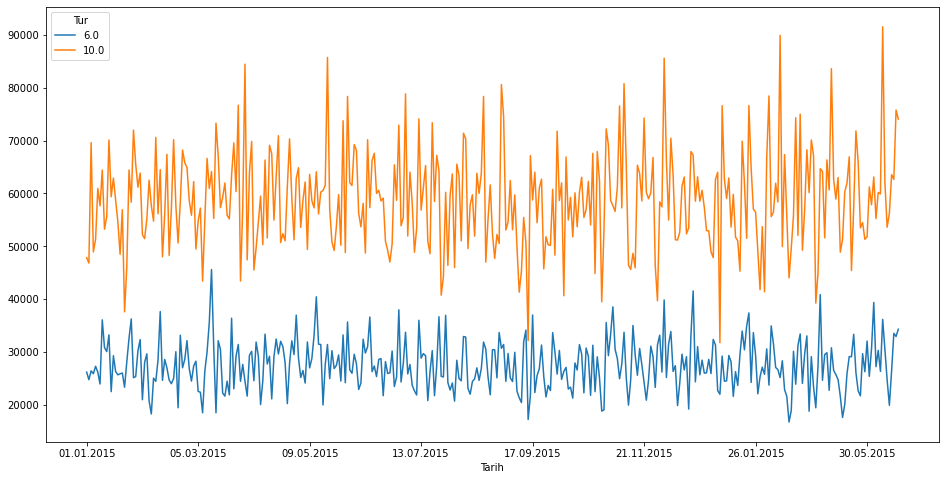

In [22]:
df_pivot.plot(figsize = (16,8))
plt.show()